In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

from helpers import load_dict
from plotting_helpers import add_gridlines, set_x_ticks, add_energy_legends


In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

bigger_font_size=22
column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Helper Functions

In [3]:
def get_intercept_error(X, Y, slope):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    intercept_ols = mean_y - slope * mean_x
    intercept_error_ols = np.std(Y - (slope * X + intercept_ols))
    return intercept_error_ols


# Load Data

In [4]:
Ls = np.arange(6,37,6)
scales = [1.,2.,4.]
rates = [0.475,0.25,0.158]
Ts = [0.25,1.00]
mss = ['Square', 'Triangular']

In [5]:
plotting_data = load_dict('./plotting_data/final_energies_data_plotting.pkl')
zero_var = load_dict('./plotting_data/zero_var_energies.pkl')

In [6]:
rate_markers={0.158:'*',0.25:'H',0.475:'^'}
rate_lines={0.158:':',0.25:'--',0.475:'-'}
rate_alphas={0.475:0.2,0.25:0.5,0.158:0.9}
rate_markersize={0.158:9,0.25:7,0.475:7}

colorscale_sq = plt.get_cmap('plasma')
colorscale_tri = plt.get_cmap('viridis')
shades = np.linspace(0.,0.9,2*len(scales))[::-2]
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'Square':{1.0:colors_sq[-3],2.0:colors_sq[-2],4.0:colors_sq[-1]},
                'Triangular':{1.0:colors_tri[-3],2.0:colors_tri[-2],4.0:colors_tri[-1]}}


Linear Fit, scale=1.0, rate=0.475
M from <SS>:   -0.540995639155423

Linear Fit, scale=1.0, rate=0.25
M from <SS>:   -0.5440990452134458

Linear Fit, scale=1.0, rate=0.158
M from <SS>:   -0.5455799097694145

Linear Fit, scale=2.0, rate=0.475
M from <SS>:   -0.5433025865664347

Linear Fit, scale=2.0, rate=0.25
M from <SS>:   -0.5458797830572292

Linear Fit, scale=2.0, rate=0.158
M from <SS>:   -0.5470499510524602

Linear Fit, scale=4.0, rate=0.475
M from <SS>:   -0.5452708184637615

Linear Fit, scale=4.0, rate=0.25
M from <SS>:   -0.547170428844061

Linear Fit, scale=4.0, rate=0.158
M from <SS>:   -0.5481105715852761


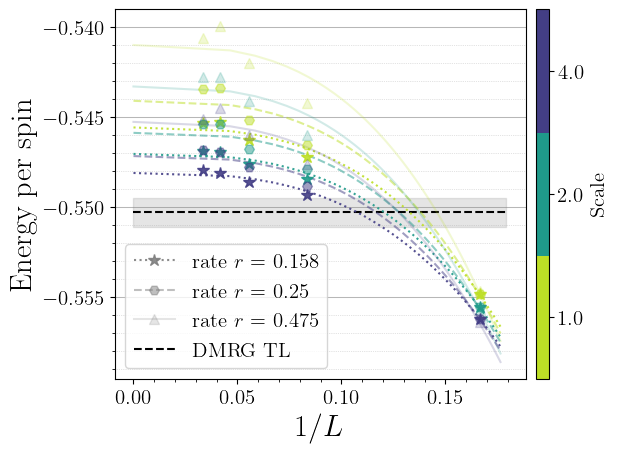

In [11]:
fig, ax = plt.subplots()
show_zero_var = False
show_runs = True
both_MS = False

## periodic bc runs
bc_ = 'periodic'
ms_ = 'Triangular'
if show_runs:
    for scale_ in scales:
        for rate_ in rates[:]:
                T_ = 1.0
                T_ = "{:.2f}".format(T_)

                peri_ens_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
                peri_ens = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['energies']
                peri_ens_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['std errors']

                ax.errorbar(1/peri_ens_ls,peri_ens,#yerr=peri_ens_errs,
                        marker=rate_markers[rate_],alpha=rate_alphas[rate_],markersize=rate_markersize[rate_],
                        fmt='o',color=scale_shades[ms_][scale_])  

                if len(peri_ens)>=2:
                        ens_x = 1/peri_ens_ls**3
                        reg = LinearRegression().fit(ens_x[:,np.newaxis], peri_ens)
                        x_mesh = np.arange(0,1.2*max(ens_x),0.0001)
                        ax.plot(x_mesh**(1/3),reg.coef_*x_mesh+reg.intercept_,
                                color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],linestyle=rate_lines[rate_])
                        print(f"\nLinear Fit, scale={scale_}, rate={rate_}\nM from <SS>:   {(reg.intercept_)}")

if show_zero_var:
        i= 1
        j= len(zero_var['periodic']['Ls'][:])
        zero_var_ls = 1/np.array(zero_var['periodic']['Ls'][:])
        ax.errorbar(zero_var_ls,zero_var['periodic']['energies bootstrapped'][:],yerr=zero_var['periodic']['energy errors bootstrapped'][:],
                    ms=11,marker='o',fmt='o',color='k',mfc='white')  
        reg_x = zero_var_ls**3
        print(len(reg_x[i:j,np.newaxis]))
        reg = LinearRegression().fit(reg_x[i:j,np.newaxis], zero_var['periodic']['energies bootstrapped'][i:j])
        x_mesh = np.arange(0,1.2*max(reg_x),0.000001)
        ax.plot(x_mesh**(1/3),reg.coef_*x_mesh+reg.intercept_,
                color='k',linestyle='-')
        print(f"\nLinear Fit, zero-var energies\nM from <SS>:   {(reg.intercept_)}")

if both_MS:
        bc_ = 'periodic'
        ms_ = 'Square'
        scale_ = 2.0
        rate_ = 0.475
        T_ = "{:.2f}".format(1.00)

        sqMS_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        sqMS = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['energies']
        sqMS_err = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['std errors']

        ax.errorbar(1/sqMS_ls,sqMS,
                marker=rate_markers[rate_],fmt='o',color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_])  

# references
# gfmc_ref = ax.hlines(-0.1819*3,0,max(1/peri_ens_ls),color='k',alpha=0.4,linestyle='--',label='GFMCSR')
# ed_ref = ax.hlines(-0.1825*3,0,max(1/peri_ens_ls),color='k',alpha=0.7,linestyle='--',label='ED')
tn_ref = ax.hlines(-0.5503,0,0.18,color='k',alpha=1,linestyle='--')
ax.fill_between(np.arange(0,0.18,0.001),-0.5503-0.0008,-0.5503+0.0008,color='grey',alpha=0.2)

ax.set_xlabel(r'$1/L$',fontsize=bigger_font_size)
ax.set_ylabel(r'Energy per spin',fontsize=bigger_font_size)
if show_zero_var:
        ax.set_ylim(-0.555,-0.548)
        ax.set_xlim(-0.005,0.12)

add_gridlines(axes='y')
add_energy_legends(reference_label='DMRG',show_runs=show_runs,both_MS=both_MS,show_zero_var=show_zero_var)

filename = 'energies_peri'
if show_runs:
       filename+='_all_runs'
if show_zero_var:
      filename+='_zero_var'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

Need to get zero variance energies and perform the finite-size scaling there...

RNN extrapolated zero-var energy: -0.5517549432583485 (error=0.0009378442526531562)


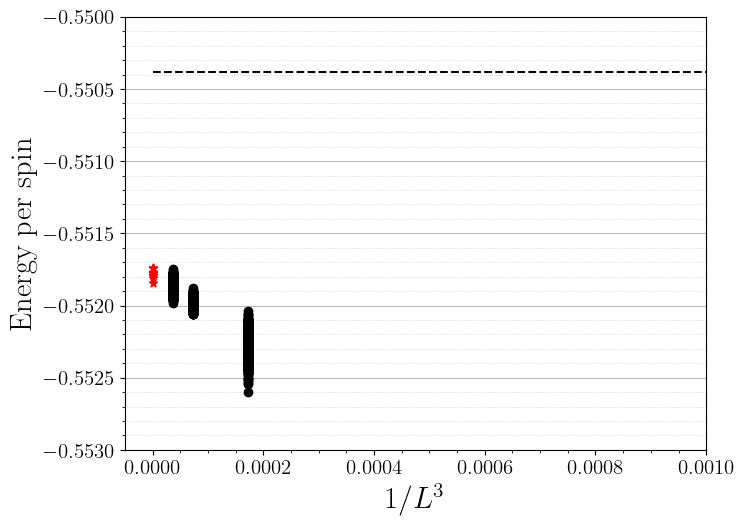

--------------------------------------------------
y-int estimates
--------------------------------------------------
y-int before:     -0.5517549432583485
y-int BOOTSTRAP:  -0.551756949524924
err(y-int) before:     0.0009378442526531562
err(y-int) BOOTSTRAP:  9.548850157916894e-07


In [8]:
np.random.seed(100)
Nb = 1000

zero_var_Ls = np.array(zero_var['periodic']['Ls'])
zero_var_ens = zero_var['periodic']['energies bootstrapped']
zero_var_errs = zero_var['periodic']['energy errors bootstrapped']

# Reproduce linear regression from above
x = 1/zero_var_Ls**3
i = 1
og_reg_x = x[...,np.newaxis][i:]
og_reg_y = zero_var_ens[i:]
og_reg = LinearRegression().fit(og_reg_x, og_reg_y) 
og_err = get_intercept_error(og_reg_x,og_reg_y,og_reg.coef_)    
print(f"RNN extrapolated zero-var energy: {og_reg.intercept_} (error={og_err})")

fig, ax = plt.subplots(figsize=square_fig_size)
add_gridlines(axes='y')

# Get Residuals
xs = np.reshape(np.tile(1/zero_var_Ls**3, Nb),(Nb,-1))
predicted_ys = og_reg.coef_*x + og_reg.intercept_
residuals = zero_var_ens - predicted_ys

# Get resampled y values
gaussian_vars = np.random.normal(loc=0.0,scale=1.0,size=(Nb,len(predicted_ys)))
resampled_ys = predicted_ys + residuals * gaussian_vars
ax.scatter(xs, resampled_ys, color='k')

# Perform linear fits through resampled data
intercepts = []
for b in range(Nb):
    reg_x = xs[b,i:][:,np.newaxis]
    reg_y = resampled_ys[b,i:]
    regb = LinearRegression().fit(reg_x, reg_y)     
    intercepts.append(regb.intercept_)
    if b % 100 == 0:
        ax.scatter(0,regb.intercept_,marker='*',color='red')

intercepts = np.array(intercepts)
    
ax.hlines(-0.55038,0,max(x),color='k',alpha=1,linestyle='--',label='TN')
ax.set_xlim(-0.00005, 0.001)  # Optionally zoom into a region
ax.set_ylim(-0.553, -0.55)  # Optionally zoom into a region
ax.set_ylabel('Energy per spin',fontsize=bigger_font_size)
ax.set_xlabel(f'$1/L^3$',fontsize=bigger_font_size)
plt.show()

print("-" * 50)
print(f"y-int estimates")
print("-" * 50)
print("y-int before:    ", og_reg.intercept_)
print("y-int BOOTSTRAP: ", np.mean(intercepts))
print("err(y-int) before:    ", og_err)
print("err(y-int) BOOTSTRAP: ", np.std(intercepts)/np.sqrt(Nb))

## Variances

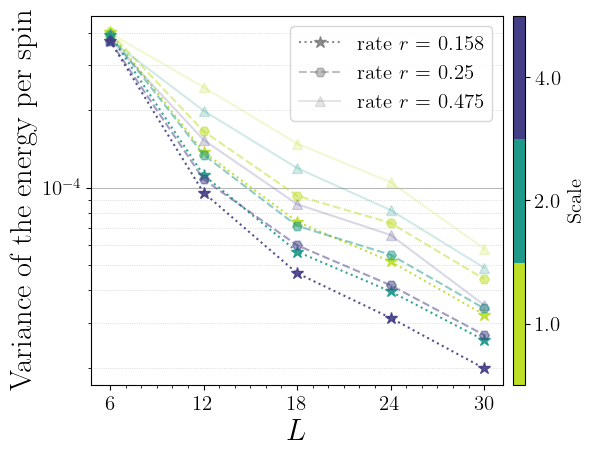

In [9]:
fig, ax = plt.subplots()

## periodic bc runs
bc_ = 'periodic'
ms_ = 'Triangular'
for scale_ in scales:
    for rate_ in rates:
        T_ = 1.0
        T_ = "{:.2f}".format(T_)

        peri_ens_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        peri_vars = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['variances']

        ax.errorbar(peri_ens_ls,peri_vars,#yerr=peri_ens_errs,
                    color=scale_shades[ms_][scale_],
                    marker=rate_markers[rate_],markersize=rate_markersize[rate_],linestyle=rate_lines[rate_],alpha=rate_alphas[rate_])  


add_energy_legends(show_runs=True)
add_gridlines(axes='y')
set_x_ticks(axes=ax)

ax.set_xlabel(r'$L$',fontsize=bigger_font_size)
ax.set_ylabel(r'Variance of the energy per spin',fontsize=bigger_font_size)
ax.set_yscale('log')

filename = 'energy_vars_peri'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)
plt.savefig('./presentation/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()